# Titanic

### A.k.a The titanic failure in trying to improve @skanev and @lacho results

Днес ще explore-ваме данните от [Titanic competition](https://www.kaggle.com/c/titanic) в Kaggle. Целта ни е да повишим score-а на двамата лектори - Стефан Кънев и Лъчезар Божков (може би е само на Стефан, не съм сигурен) от `0.78947`. Преди това, импортите:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

и малко default settings

In [2]:
pd.options.display.max_rows = 30
sns.set()

Готови сме да започваме!

## 1. Data Exploration

Преди да можем да тренираме каквото и да е било първо трябва да заредим, разгледаме, разчистим, инженерстваме и енкоуднем данните. Това ще правим в първата част на този ноутбук. 

Като за начало данните са разделени на два сета: train и test. Train сета съдържа цялата информация, a тест сета не съдържа информация за това дали човека е оцелял или не. Идеята на тест сета е да събмитнем "предсказанията" си и да видим на кое място ще се наредим сред 9k+ хората който са качили решенията си в Kaggle.

### 1.1 Import

In [6]:
original_data = pd.read_csv('train.csv', index_col='PassengerId')
original_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Още на пръв поглед виждаме първия ни проблем. В колоната Cabin има твърде много N/A стойности. Нека видим точно колко:

In [12]:
original_data['Cabin'].isna().sum()

687

Това са доста повече от колкото очаквах. Не съм сигурен дали изобщо ще можем да използваме тази колона по какъвто и да е било начин. Но преди да правим каквото и нека видим description-a на данните:

In [13]:
original_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Tова е информацията за числовите колони в dataframe-а. Виждаме, че най-вероятно ще ни се наложи да гадаем възрастта на част от пътниците. Всички останали числови колони изглеждат запълнени. Нека проверим и нечисловите:

In [35]:
non_numeric_columns = [column for column in original_data.columns.tolist() if not column in original_data.describe().columns.tolist()]
[(column, type(original_data[column].dropna().iloc[0]), len(original_data[column].replace('', np.nan).dropna())) for column in non_numeric_columns]

[('Name', str, 891),
 ('Sex', str, 891),
 ('Ticket', str, 891),
 ('Cabin', str, 204),
 ('Embarked', str, 889)]

Виждаме че нямаме информация и за това от къде са се качили двама от пътниците. За тях ще можем да направим нова стойност която ще отговаря за това че не знаем. Нека направим clone на оригиналната data.

In [38]:
data = original_data.copy()

Нека си направим baseline модел по-който да следим прогреса си. За него ще използваме само numeric колоните и ще попълним nan-овете на age с 0.

In [39]:
numeric_data = data[data.describe().columns]
numeric_data

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
6,0,3,NaN,0,0,8.4583
7,0,1,54.0,0,0,51.8625
8,0,3,2.0,3,1,21.0750
9,1,3,27.0,0,2,11.1333


In [41]:
numeric_data = numeric_data.fillna(0)
numeric_data

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
6,0,3,0.0,0,0,8.4583
7,0,1,54.0,0,0,51.8625
8,0,3,2.0,3,1,21.0750
9,1,3,27.0,0,2,11.1333


Между другото ми е интересно да видя възрастовото разпледеление на пътниците, затова:

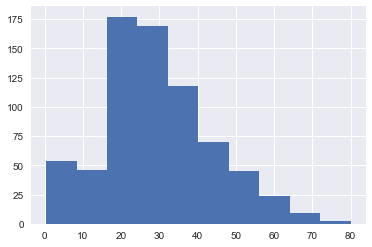

In [43]:
original_data['Age'].hist();

и след като занулихме:

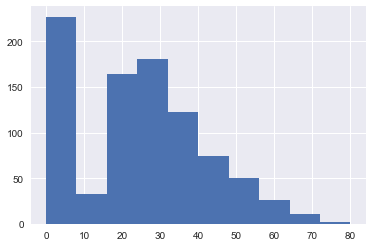

In [46]:
numeric_data['Age'].hist();

Back on track ...

### Baseline model

За baseline model-а ще използваме логистична регресия.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = numeric_data.drop(['Survived'], axis = 1)
y = numeric_data['Survived']

# Избираме random_state = 0 за да можем да сравняваме с резултатите получени от skanev
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify = y)


regressor = LogisticRegression()
regressor.fit(X_train, y_train)
train_score = regressor.score(X_train, y_train)
test_score  = regressor.score(X_test,  y_test)
print("Train score", train_score)
print("Test score", test_score)

Train score 0.709580838323
Test score 0.686098654709


Модела не отгатва твърде зле (по-добре е от cointoss, което общо взето автоматично го прави и по-добър от по-голямата част от гадателките), но много лесно можем да направим минимален improvement, като добавим малко по-добро "предсказване" за незнайните възрасти.

In [64]:
X['Age'] = original_data['Age'].fillna(original_data['Age'].mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify = y)


regressor = LogisticRegression()
regressor.fit(X_train, y_train)
train_with_mean_score = regressor.score(X_train, y_train)
test_with_mean_score  = regressor.score(X_test,  y_test)
print("Train score", train_with_mean_score)
print("Test score",  test_with_mean_score)
print("Diff train",  train_with_mean_score - train_score)
print("Diff test",   test_with_mean_score - test_score)

Train score 0.708083832335
Test score 0.695067264574
Diff train -0.00149700598802
Diff test 0.00896860986547


Така веднага видяхме микроскопично подобрение в трейн сет-а. За възрастта ще направим повече по-късно.

### Title
Когато погледнем имената можем да видим, че там се крият титлите на хората. По-голямата част от хората ще са просто Mr. или Mrs., но може би богаташите, на които са били дадени спасителни лодки, ще носят по-интересни титли.

In [80]:
regex = r".*,\s([A-Za-z]+\.)"
titles = data.Name.str.extract(regex)
titles.value_counts()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Mme.           1
Lady.          1
Don.           1
Sir.           1
Capt.          1
Jonkheer.      1
Ms.            1
Name: Name, dtype: int64

Тук имаме някои много интересни honorifics. За надало Mlle = Mademoiselle = Miss, Mme = Madame = Mrs. Lady, която най-вероятно ще сложим към Mrs. Don, Sir, Jonkheer са титли на благородници от мъжки пол, така че ще е добре да ги съберем на едно и също място, както Major. Col. и Capt. са военни. Тъй като воените може би са по склонни към самопожертвувание ще ги отделим от останалите мъжки титили. Всъщност можем да го проверим, но след като си напишем функция която да ни дава правилни титли.

In [86]:
import re

def title_conversion(name):
    srch = re.search(r".*,\s([A-Za-z]+\.)", name)
    if srch:
        title = srch.group(1)
        if title in ["Miss.", "Mlle."]:
            return "Miss."
        if title in ["Mrs.", "Mme.", "Lady.", "Ms."]:
            return "Mrs."
        if title in ["Mr.", "Dr.", "Rev."]:
            return "Mr."
        if title in ["Don.", "Sir.", "Jonkheer."]:
            return "Don."
        if title in ["Major.", "Col.", "Capt."]:
            return "Major."
        return title
    
titles = [title_conversion(name) for name in data['Name']]
pd.Series(titles).value_counts()

Mr.        530
Miss.      184
Mrs.       128
Master.     40
Major.       5
Don.         3
dtype: int64

Така намалихме броя на title-ите, без да се отказваме от смисъла зад тях.

Нека бъдем fancy и си направим трансформатор използващ функцията по-горе.

In [115]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

class AddTitleTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        None
    def fit(self, X = None, y = None):
        None
    def transform(self, X):
        for index, row in X.iterrows():
            X.loc[index, 'Title'] = title_conversion(row['Name'])
        return X

AddTitleTransformer().transform(data)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr.
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr.
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master.
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs.


Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                              22
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin                           NaN
Embarked                          S
Name: 1, dtype: object

In [103]:
data['Title'].value_counts()

Mr.    891
Name: Title, dtype: int64